# Planning observations with `astroplan`

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import astropy.units as u
from astropy.time import Time
import pytz

from astroplan.plots import plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range
from astroplan.plots import plot_finder_image

---
# Time and Dates

<img src="https://uwashington-astro300.github.io/A300_images/UTC2.jpg" width="300"/>

- ### All dates and times in are UTC: *Coordinated Universal Time*
- All `Time` calculation assume that the time is UTC.
- UTC does not change with a change of seasons.
- UTC is the time standard for aviation, weather forecasts, the International Space Station, and Amateur radio operators .
- Time will default to 00:00:00 UTC.

In [2]:
my_date = Time("2024-02-14 21:40")

my_date

<Time object: scale='utc' format='iso' value=2024-02-14 21:40:00.000>

In [3]:
my_date.iso

'2024-02-14 21:40:00.000'

In [4]:
f"The value of my_date is {my_date.iso}"

'The value of my_date is 2024-02-14 21:40:00.000'

### Different Date Formats

In [5]:
print(f"The Julian Date is {my_date.jd:.2f}")

print(f"The Modified Julian Date is {my_date.mjd:.2f}")

print(f"The unix Epoch is {my_date.unix:.2f}")  # Seconds since (Jan 01, 1970 00:00:00 UTC)

print(f"The fraction of a year is {my_date.decimalyear:.2f}")

The Julian Date is 2460355.40
The Modified Julian Date is 60354.90
The unix Epoch is 1707946800.00
The fraction of a year is 2024.12


In [6]:
my_date.ymdhms

(2024, 2, 14, 21, 40, 0.)

In [7]:
print(
    f"This is the {my_date.ymdhms[2]} day of the {my_date.ymdhms[1]} month of the year {my_date.ymdhms[0]} "
    f"at a time of {my_date.ymdhms[3]} hours, {my_date.ymdhms[4]} minutes, and {my_date.ymdhms[5]} seconds UTC"
)

This is the 14 day of the 2 month of the year 2024 at a time of 21 hours, 40 minutes, and 0.0 seconds UTC


---

### [Accurate Time](https://www.ucolick.org/~sla/leapsecs/amsci.html) - `UT1`

* `AstroPy` calculates the times of events to a very high accuracy.
* Earth's rotation period is constantly changing due to tidal forces and changes in the Earth's moment of inertia.
* `AstroPy` uses a time convention called `UT1`.
* `UT1` is constanly changing with repect to `UTC`.
* This system is tied to the rotation of the Earth with repect to the positions of distant quasars (International Celestial Reference Frame).

[`UT1` is not really a time, it’s a way to express the Earth’s rotation angle and it should not be thought of as a real time scale](http://mperdikeas.github.io/utc-vs-ut1-time.html)

The orientation of the Earth, which must be measured continuously to keep `UT1` accurate. This measurement is logged by the International Earth Rotation and Reference Systems Service (IERS). They publish a "bulletin" with the most recent measurements of the Earth's orientation. This bulletin is constantly being updated.

You will run into occasions when you will get a warning that your dates are out of range of the IERS bulletin. To update the bulletin, run the follow block of code (this can take a while to run - so be patient):

---

In [8]:
from astroplan import download_IERS_A
download_IERS_A()

In [9]:
my_date.ut1

<Time object: scale='ut1' format='iso' value=2024-02-14 21:39:59.999>

In [10]:
my_date

<Time object: scale='utc' format='iso' value=2024-02-14 21:40:00.000>

---
# Places

<img src="https://uwashington-astro300.github.io/A300_images/LatLon.jpg" width="400"/>

## Setting your location - `Observer`

* `longitude` and `latitude` - any angular unit
  * `longitude` - measured East/West from Prime Meridian (+180 deg to -180 deg)
  * `latitude` - measured North/South from Equator (+90 deg to -90 deg)
* `timezone` - see below
* `name` - any string

#### `longitude` and `latitude` can take any angular unit, not just the examples I show below!

- I like decimal degrees as they are harder to mess up.

In [11]:
computer_room = Observer(longitude = -122.311473 * u.deg,
                         latitude = +47 * u.deg + 39 * u.arcmin + 15 * u.arcsec,
                         timezone = 'US/Pacific',
                         name = "UW Astro Computer Lab"
                        )

In [12]:
computer_room

<Observer: name='UW Astro Computer Lab',
    location (lon, lat, el)=(-122.31147300000006 deg, 47.654166666666676 deg, 7.094738651737616e-10 m),
    timezone=<DstTzInfo 'US/Pacific' LMT-1 day, 16:07:00 STD>>

In [13]:
computer_room.name

'UW Astro Computer Lab'

## Note about negative values for latitude and longitude

* If you use decimal degrees, this format is good: `longitude = -122.311473 * u.deg`
* If you are using deg, min, sec, make sure to use `()`: `longitude = -(122 * u.deg + 18 * u.arcmin + 38.5 * u.arcsec)`
  * Note the `-` outside the `()`

---
## Working with timezones (local time)

* [Timezone List](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones)
* [Timezone Map](https://uwashington-astro300.github.io/A300_images/TZ.png)
* Use the name in the **TZ database name** column.
* Only use timezone conversions for printouts, NEVER calculations!
* If you cannot find the exact timezone but know the offset from GMT use: `Etc/GMT(+/-)OFFSET` - (Example: `Etc/GMT-8`)
* Working with tomezones is a [quick path to maddness!](https://xkcd.com/1883/)

In [14]:
computer_room.timezone

<DstTzInfo 'US/Pacific' LMT-1 day, 16:07:00 STD>

In [15]:
local_now = my_date.to_datetime(computer_room.timezone)

print(local_now)

2024-02-14 13:40:00-08:00


---

## Information at your location

<img src="https://uwashington-astro300.github.io/A300_images/SunNoon.jpg" width="300"/>

### `noon` - output: UTC datetime of noon at your location

* `LOCATION.noon(DATE, WHICH)`
* `DATE` : Time of observation
* `WHICH`: Choose which noon relative to the present `DATE` would you like to calculate:
  * next
  * previous
  * nearest

In [16]:
my_noon = computer_room.noon(my_date, which = "previous")

In [17]:
my_noon

<Time object: scale='utc' format='jd' value=2460355.3497753437>

In [18]:
print(my_noon.to_datetime(computer_room.timezone))

2024-02-14 12:23:40.589693-08:00


---

### `midnight` = anti-noon

* Since we know `noon` we know the midnight we want is `next`

In [19]:
my_midnight = computer_room.midnight(my_noon, which='next')

In [20]:
my_midnight

<Time object: scale='utc' format='jd' value=2460355.8494296074>

In [21]:
print(my_midnight.to_datetime(computer_room.timezone))

2024-02-15 00:23:10.718079-08:00


---

## Side topic - Local Sidereal Time (LST)

* LST is the Right Ascension (RA) on the meridian (above your head) at your **location** at your current **time**
* LST is measured in hours (0h - 24h)

### The LST in the computer room at midnight is:

In [22]:
computer_room.local_sidereal_time(my_midnight)

<Longitude 9.88888501 hourangle>

### You can then look at a [star chart](https://tobyrsmith.github.io/images/StarChart.jpg) to see what is up

---

### `tonight` - output `[UTC datetime sunset, UTC datetime sunrise]`

* `LOCATION.tonight(TIME, HORIZON)`
  * The `TIME` has to be before local sunset!
  * `HORIZON`: Sun position above/below horizon to use for calculating set/rise time
  * Outputs 2 times - sunset and sunrise

In [23]:
tonight_here = computer_room.tonight(my_noon, horizon = 0 * u.deg)

In [24]:
tonight_here

(<Time object: scale='utc' format='jd' value=2460355.5591102107>,
 <Time object: scale='utc' format='jd' value=2460356.139358937>)

In [25]:
print(f"Sunset will be at {tonight_here[0].iso} UTC")
print(f"Sunrise will be at {tonight_here[1].iso} UTC")

Sunset will be at 2024-02-15 01:25:07.122 UTC
Sunrise will be at 2024-02-15 15:20:40.612 UTC


In [26]:
local_sunset = tonight_here[0].to_datetime(computer_room.timezone)
local_sunrise = tonight_here[1].to_datetime(computer_room.timezone)

print(f"Sunset will be at {local_sunset} local time")
print(f"Sunrise will be at {local_sunrise} local time")

Sunset will be at 2024-02-14 17:25:07.122208-08:00 local time
Sunrise will be at 2024-02-15 07:20:40.612140-08:00 local time


---

### Astronomical twilight is when the Sun is 18 degrees below the horizon

* This is often the time to begin/end observation

In [27]:
observe_night = computer_room.tonight(my_noon, horizon = -18 * u.deg)

In [28]:
print(f"Start observations tonight at {observe_night[0].iso} UTC")
print(f"End observations tonight at {observe_night[1].iso} UTC")

Start observations tonight at 2024-02-15 03:14:08.123 UTC
End observations tonight at 2024-02-15 13:31:58.303 UTC


In [29]:
observing_length = (observe_night[1] - observe_night[0]).to(u.h)

print(f"You can observe for {observing_length:.1f} tonight")

You can observe for 10.3 h tonight


In [30]:
# Local Times

print(f"Tonight's observing starts at {observe_night[0].to_datetime(computer_room.timezone)} local time")
print(f"Tonight's observing ends at {observe_night[1].to_datetime(computer_room.timezone)} local time")

Tonight's observing starts at 2024-02-14 19:14:08.122738-08:00 local time
Tonight's observing ends at 2024-02-15 05:31:58.303281-08:00 local time


---
### [There is lots of information available for your location](https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html)


In [31]:
computer_room.is_night(my_noon)

False

In [32]:
computer_room.moon_illumination(my_midnight)

0.36311258963036686

In [33]:
computer_room.moon_phase(my_noon).to(u.deg)

<Quantity 112.35032921 deg>

180 deg = New Moon, 0 deg = Full Moon

---
# Things

## Objects in the sky - `FixedTarget`

In [34]:
my_target_one = FixedTarget.from_name('M101')

In [35]:
my_target_one

<FixedTarget "M101" at SkyCoord (ICRS): (ra, dec) in deg (210.8024292, 54.34875)>

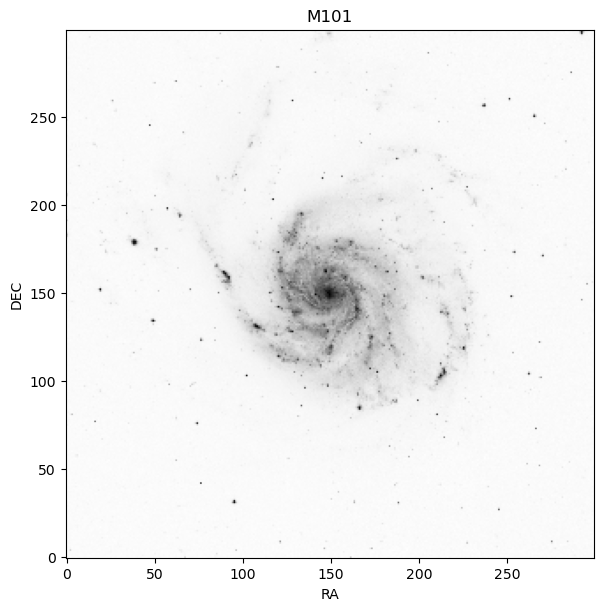

In [36]:
fig, ax  = plt.subplots(
    figsize = (6, 6), 
    constrained_layout = True
)

ax, hdu = plot_finder_image(
    my_target_one, 
    fov_radius= 0.5 * u.deg, 
    ax = ax,
    survey = 'DSS2 Blue'
);

### Can you see the object at midnight tonight?

In [37]:
computer_room.target_is_up(my_midnight, my_target_one)

True

---
## Where in the sky?

<img src="https://uwashington-astro300.github.io/A300_images/AltAz.gif" width="350"/>

* Altitude (Alt) - Degrees above horizon
* Azimuth (Az) - Compass degrees from North
* `LOCATION.altaz(TIME, TARGET)`


In [38]:
where_to_look = computer_room.altaz(my_midnight, my_target_one)

In [39]:
where_to_look.alt

<Latitude 51.29104665 deg>

In [40]:
where_to_look.az

<Longitude 56.15636952 deg>

---

### [Air Mass](https://en.wikipedia.org/wiki/Air_mass_%28astronomy%29) is the optical path length through Earth’s atmosphere. 

<img src="https://uwashington-astro300.github.io/A300_images/Airmass.png" width="200"/>

* At sea-level, the air mass at the zenith is 1. 
* Air mass increases as you move toward the horizon.
* Air mass at the horizon is approximately 38.
* The best time to observe a target is at minimum airmass.
* When the airmass of your target is getting close to 2, you should be observing another target.

In [41]:
# You can find the airmass by using the .secz method

where_to_look.secz

<Quantity 1.28150468>

#### Airmass < 2, you are good to go.

### Not all targets can (or should) be observed at all locations

In [42]:
my_target_two = FixedTarget.from_name("Sirius")

In [43]:
computer_room.target_is_up(my_midnight, my_target_two)

True

In [44]:
where_to_look_two = computer_room.altaz(my_midnight, my_target_two)

In [45]:
where_to_look_two.alt, where_to_look_two.az

(<Latitude 13.23028718 deg>, <Longitude 225.78972166 deg>)

In [46]:
where_to_look_two.secz

<Quantity 4.36937885>

#### Airmass > 2, a big NOPE!

---

## Planning observation is better with plots

#### Setup our observing window

In [47]:
my_time_grid = time_grid_from_range(observe_night, time_resolution = 0.1 * u.h)

In [48]:
my_time_grid[0:5]

<Time object: scale='utc' format='jd' value=[2460355.63481624 2460355.6389829  2460355.64314957 2460355.64731624
 2460355.6514829 ]>

## Simple Plot

* Ignore the warning

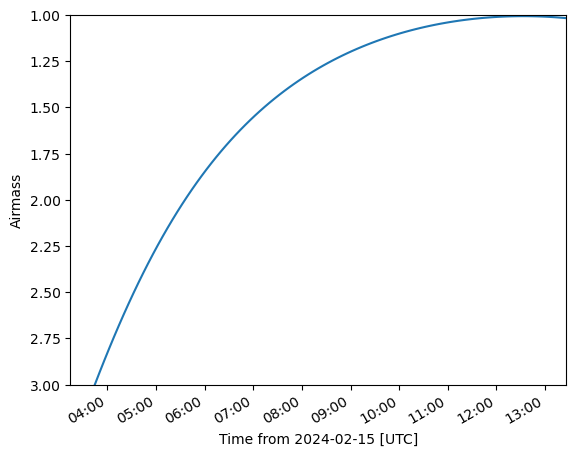

In [49]:
plot_airmass(my_target_one, computer_room, my_time_grid);

## Better Plot

### Make a target list

In [50]:
target_list = [my_target_one, my_target_two]

In [51]:
target_list

[<FixedTarget "M101" at SkyCoord (ICRS): (ra, dec) in deg (210.8024292, 54.34875)>,
 <FixedTarget "Sirius" at SkyCoord (ICRS): (ra, dec) in deg (101.28715533, -16.71611586)>]

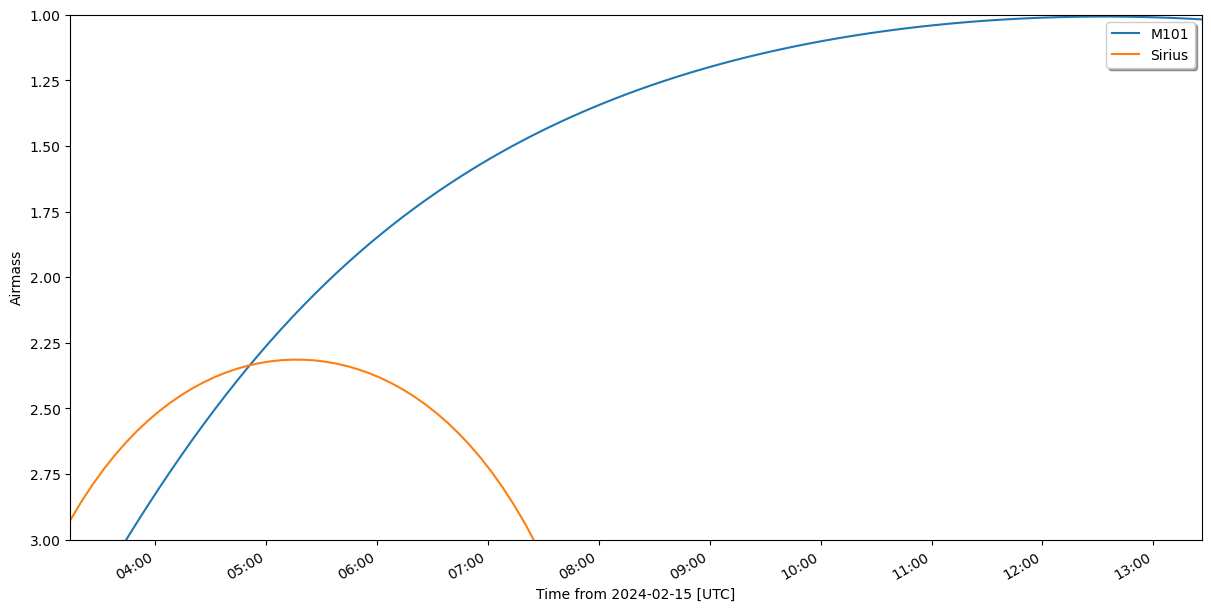

In [52]:
fig, ax = plt.subplots(
    figsize = (12, 6), 
    constrained_layout = True
)

for my_object in target_list:
    ax = plot_airmass(my_object, computer_room, my_time_grid)

ax.legend(loc=0,shadow=True);